In [1]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ETree
import os

In [2]:
def texto_xmltoDF_ENEM(caminho, XMLs):
  xmlToDf = pd.DataFrame(columns=['ano','versao','area','questao_Nr','question','A','B','C','D','E'])
  for XML in range(len(XMLs)):
    print(XMLs[XML])
    tree = ETree.parse(caminho + XMLs[XML])
    prstree = tree.getroot()
    root = prstree.tag

    questao_items = []
    all_items = []

    for testno in prstree.findall('QUESTAO'):
      questao_Nr = testno.attrib.get('qtsNo')
      ano = testno.find('ANO').text
      area = testno.find('AREA').text
      versao = testno.find('VERSAO').text
      question = testno.find('ENUNCIADO').text
      A = testno.find('ALTERNATIVA_A').text
      B = testno.find('ALTERNATIVA_B').text
      C = testno.find('ALTERNATIVA_C').text
      D = testno.find('ALTERNATIVA_D').text
      E = testno.find('ALTERNATIVA_E').text
      #Q_true = testno.find('CORRETA').text

      store_items = [ano,versao,area,questao_Nr,question,A,B,C,D,E]#,Q_true]
      all_items.append(store_items)
      #print(store_items)

    temp = pd.DataFrame(all_items,columns=[
        'ano','versao','area','questao_Nr','question','A','B','C','D','E']) #,'Q_true'
    xmlToDf = pd.concat([xmlToDf, temp])
    print(len(xmlToDf))

    #print(xmlToDf.to_string(index=False))
  return xmlToDf

#Df = texto_xmltoDF_ENEM(caminho, XMLs)

In [3]:
user = 'andreramalho'
repo = 'provas_enem'

# remove local directory if it already exists
if os.path.isdir(repo):
    !rm -rf {repo}

!git clone https://github.com/{user}/{repo}.git

Cloning into 'provas_enem'...
remote: Enumerating objects: 213, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 213 (delta 18), reused 0 (delta 0), pack-reused 156 (from 1)
Receiving objects: 100% (213/213), 22.08 MiB | 13.38 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [4]:
print(os.listdir(repo))
os.getcwd()

['.git', 'provas_2015_2020.xml', '_subgrupos_glove_300.csv', 'Consulta_questoes_ENEM.ipynb', '_subgrupos_glove_100.csv']


'/content'

In [5]:
#print(os.getcwd())
temp = os.listdir(repo)
XMLs = []
for f in temp:
  if f[-3:] == 'xml':
    XMLs.append(f)
print(XMLs)

caminho = '/content/provas_enem/'
Df = texto_xmltoDF_ENEM(caminho, XMLs)
Df.reset_index(drop=True, inplace=True)

['provas_2015_2020.xml']
provas_2015_2020.xml
2400


In [6]:
# Comente uma das duas linhas para avaliar resultados

#results = pd.read_csv('/content/provas_enem/_subgrupos_glove_100.csv')
results = pd.read_csv('/content/provas_enem/_subgrupos_glove_300.csv')

In [7]:
Dff = pd.concat([results, Df], axis=1)
Dff.head()

,grupos,sub-grupos,ano,versao,area,questao_Nr,question,A,B,C,D,E
0,91,4,2015.0,impressa,ciências humanas,01,BRASIL. Ministério do Meio Ambiente/IBGE. Biom...,esertificação das áreas afetadas.,oluição dos rios temporários.,ueimadas dos remanescentes vegetais.,esmatamento das matas ciliares.,ontaminação das águas subterrâneas.
1,76,0,2015.0,impressa,ciências humanas,02,Dominar a luz implica tanto um avanço tecnológ...,elhoria da qualidade da produção industrial.,edução da oferta de emprego nas zonas rurais.,ermissão ao trabalhador para controlar seus pr...,iminuição das exigências de esforço no trabalh...,mpliação do período disponível para a jornada ...
2,45,2,2015.0,impressa,ciências humanas,03,Apesar de seu disfarce de iniciativa e otimism...,esenvolvimento do pensamento autônomo.,btenção de qualificação profissional.,esgate de valores tradicionais.,ealização de desejos pessoais.,umento da renda familiar.
3,82,1,2015.0,impressa,ciências humanas,04,AMARILDO. Disponível em: www.amarildo.com.br. ...,levado preço das mercadorias no comércio.,umento da demanda por produtos naturais.,rescimento da produção de alimentos.,ábito de adquirir derivados industriais.,so de agrotóxicos nas plantações.CH - 1º dia |...
4,105,4,2015.0,impressa,ciências humanas,05,"A casa de Deus, que acreditam una, está, porta...",ustificar a dominação estamental / revoltas ca...,ubverter a hierarquia social / centralização m...,mpedir a igualdade jurídica / revoluções burgu...,ontrolar a exploração econômica / unificação m...,uestionar a ordem divina / Reforma Católica.


In [8]:
#  2 - sol, astronomia, luz
# 35 - questões em inglês
# 50 - eletricidade
# 74 - questões em espanhol

Dff.loc[Dff['grupos'] == 79,['grupos','sub-grupos','question']]

,grupos,sub-grupos,question
162,79,0,A expressão “Fórmula de Young” é utilizada par...
167,79,0,A insulina é utilizada no tratamento de pacien...
170,79,0,Alguns exames médicos requerem uma ingestão de...
329,79,0,Um granjeiro detectou uma infecção bacteriológ...
366,79,0,Um paciente precisa ser submetido a um tratame...
548,79,0,Um paciente necessita de reidratação endovenos...
715,79,0,O Código de Trânsito de certo país estabelece ...
1654,79,0,"A bula de um antibiótico infantil, fabricado n..."


In [9]:
arr = []
max = 0
for g in range(len(Dff.grupos.unique())):
  temp = Dff.loc[Dff['grupos'] == g,['sub-grupos']].value_counts().values.tolist()
  arr.append(temp)
  print(g, temp)
  if max < len(temp):
    max = len(temp)
print(max)
print(arr)

#print(len(Dff.grupos.unique()))

0 [22, 1]
1 [1]
2 [13, 1]
3 [23, 1, 1]
4 [11, 1]
5 [1, 1]
6 [3, 1]
7 [1]
8 [13, 1]
9 [18, 1]
10 [1]
11 [1]
12 [73, 1, 1, 1]
13 [25]
14 [1]
15 [7, 3, 1]
16 [1]
17 [29, 2, 1, 1]
18 [1]
19 [20]
20 [1]
21 [8, 1]
22 [6, 3, 1, 1]
23 [17, 3, 1]
24 [23]
25 [28, 5, 1, 1]
26 [2, 1]
27 [26, 5, 1, 1, 1]
28 [25, 2, 1]
29 [1]
30 [9, 1, 1]
31 [24, 1, 1]
32 [36, 1, 1]
33 [15]
34 [13, 1, 1, 1]
35 [16, 6, 5, 2, 1, 1, 1, 1, 1, 1, 1]
36 [19, 1, 1, 1, 1]
37 [8]
38 [63]
39 [29, 1, 1]
40 [2, 1, 1]
41 [14]
42 [22, 1, 1]
43 [22]
44 [5, 1]
45 [70, 1, 1, 1, 1]
46 [1]
47 [1]
48 [18, 1, 1]
49 [5, 1]
50 [10]
51 [13]
52 [1]
53 [27, 6, 1, 1, 1]
54 [112, 5, 1, 1, 1]
55 [7, 2]
56 [17, 1, 1]
57 [17, 1]
58 [14]
59 [12, 1]
60 [45, 1, 1]
61 [5, 1, 1]
62 [5, 1, 1]
63 [1]
64 [32, 1, 1, 1]
65 [27, 11, 2, 1, 1, 1]
66 [17, 1, 1, 1, 1]
67 [17, 1, 1, 1]
68 [70, 1, 1, 1]
69 [13]
70 [1]
71 [16, 1]
72 [34, 1, 1, 1]
73 [2, 1]
74 [18, 10, 8, 1, 1, 1, 1]
75 [9]
76 [67, 1]
77 [13]
78 [11, 1]
79 [8]
80 [8, 4, 1]
81 [3, 1]
82 [4, 1]
83 [5

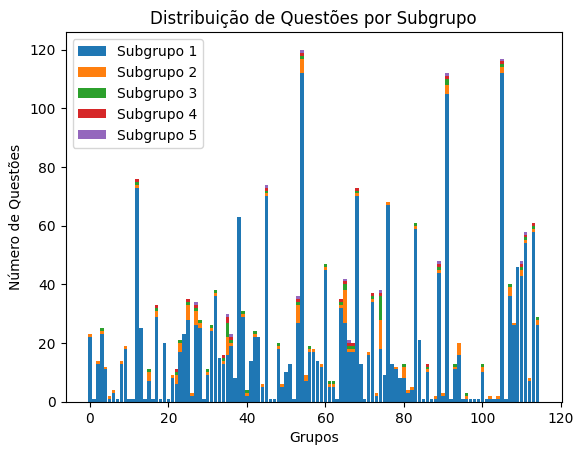

In [10]:
# demonstração da divisão dos grupos em sub-grupos

import matplotlib.pyplot as plt


# create data
x = np.arange(len(Dff.grupos.unique()))
y1 = np.array([a[0] if len(a) > 0 else 0 for a in arr])
y2 = np.array([a[1] if len(a) > 1 else 0 for a in arr])
y3 = np.array([a[2] if len(a) > 2 else 0 for a in arr])
y4 = np.array([a[3] if len(a) > 3 else 0 for a in arr])
y5 = np.array([a[4] if len(a) > 4 else 0 for a in arr])
width = 0.9

# plot data in stacked bar chart
plt.bar(x, y1, width, label='Subgrupo 1')
plt.bar(x, y2, width, bottom=y1, label='Subgrupo 2')
plt.bar(x, y3, width, bottom=y1+y2, label='Subgrupo 3')
plt.bar(x, y4, width, bottom=y1+y2+y3, label='Subgrupo 4')
plt.bar(x, y5, width, bottom=y1+y2+y3+y4, label='Subgrupo 5')

plt.xlabel('Grupos')
plt.ylabel('Número de Questões')
plt.title('Distribuição de Questões por Subgrupo')
#plt.xticks(x, labels=np.arange(len(Dff.grupos.unique())))
plt.legend()

plt.savefig('grafico_distribuicao_subgrupos.png')
plt.show()

In [11]:
np.array([a[5] if len(a) > 5 else 0 for a in arr])


for a in arr:
  if len(a) > 4:
    print(a)

[26, 5, 1, 1, 1]
[16, 6, 5, 2, 1, 1, 1, 1, 1, 1, 1]
[19, 1, 1, 1, 1]
[70, 1, 1, 1, 1]
[27, 6, 1, 1, 1]
[112, 5, 1, 1, 1]
[27, 11, 2, 1, 1, 1]
[17, 1, 1, 1, 1]
[18, 10, 8, 1, 1, 1, 1]
[44, 1, 1, 1, 1, 1]
[105, 3, 2, 1, 1, 1]
[112, 2, 1, 1, 1]
[43, 2, 1, 1, 1]
[54, 1, 1, 1, 1, 1]


In [12]:
#areas_ = 'ciências humanas', 'linguagens, códigos', 'ciências da natureza', 'matemática e suas tecnologias'

dff = pd.DataFrame(columns=['cluster','ciências humanas', 'linguagens, códigos', 'ciências da natureza', 'matemática e suas tecnologias'])

lista = {}

for n_cluster in range(len(Dff.grupos.unique())):
    idx = Dff.loc[Dff['grupos'] == n_cluster]['area'].value_counts()
    dicio = {}
    #dicio['cluster'] = n_cluster
    for n_area in range(len(idx.tolist())):
        #print({'cluster': 4})
        dicio[idx.index[n_area]] = idx.iloc[n_area]
    lista[n_cluster] = (dicio)


resultados = pd.DataFrame.from_dict(lista, orient='index').fillna(0).astype(int)


In [13]:
# Seleciona grupo conciso

print(resultados[(resultados['ciências da natureza'] > 5) &
      (resultados['linguagens, códigos'] == 0) &
      (resultados['ciências humanas'] == 0) &
      (resultados['matemática e suas tecnologias'] == 0)].head(5).to_markdown())

|     |   ciências humanas |   ciências da natureza |   linguagens, códigos |   matemática e suas tecnologias |
|----:|-------------------:|-----------------------:|----------------------:|--------------------------------:|
|  50 |                  0 |                     10 |                     0 |                               0 |
|  84 |                  0 |                     21 |                     0 |                               0 |
| 100 |                  0 |                     13 |                     0 |                               0 |


In [14]:
#print(resultados[0:50].to_markdown())